<center> <h1> Etude Santé Publique </h1> </center>

# Sommaire
1. [Introduction](#introduction)
    
2. [Demandes de Marc](#DemandesdeMarc)
    2.1.1 [Proportion de personnes en état de sous-nutrition](#Proportiondepersonnesenétatdesous-nutrition)
    2.1.2 [Nombre théorique de personnes qui pourraient être nourries](#Nombrethéoriquepersonnesnourries)
    2.2.1 [Nombre théorique de personnes qui pourraient être nourries avec des produits végétaux](#Nombrethéoriquepersonnesnourriesproduitsvégétaux)
    2.2.2 [Nombre théorique de personnes qui pourraient être nourries avec des produits animales](#Nombrethéoriquepersonnesnourriesproduitsanimales)
    2.3.1 [Utilisation de la disponibilité intérieure](#disponibiliteinterieure)
    2.3.2 [Part attribuée à l’alimentation animale](#Partalimentationanimale)
    2.3.3 [Part attribuée à l’alimentation humaine](#Partalimentationhumaine)
    2.3.4 [Part attribuée perdue](#Partalimentationperdue)
   
3. [Demandes de Mélanie](#DemandesMélanie)
    3.1 [Pays avec plus forts proportion sous alimentations en 2017](#Paysfortsproportionsousalimentations2017) 
    3.2 [Pays qui ont le plus bénéficié d’aide depuis 2013](#Paysfortaide2013) 
    3.3 [Pays ayant le plus de disponibilite/habitant](#Paysfortdisponibilite/habitant) 
    3.4 [Pays ayant le moins de disponibilite/habitant](#Paysfaiblesdisponibilite/habitant) 
   
4. [Observations de Julien](#ObservationsJulien)
   4.1.[Utilisations du Cereal](#UtilisationsCereal)
   4.2.[Utilisations du Manioc](#UtilisationsManioc)

Pour commencer notre étude, on va procéder par l'importation de nos données de la Food and Agriculture Organization of the United Nations (FAO).

In [1]:
aide_alimentaire <- read.csv("~/OpenClassrooms/Projet 4/donnees/aide_alimentaire.csv", encoding="UTF-8")
dispo_alimentaire <- read.csv("~/OpenClassrooms/Projet 4/donnees/dispo_alimentaire.csv",encoding="UTF-8")
population <- read.csv("~/OpenClassrooms/Projet 4/donnees/population.csv",encoding="UTF-8")
sous_nutrition <- read.csv("~/OpenClassrooms/Projet 4/donnees/sous_nutrition.csv",encoding="UTF-8")
cereal <- read.csv("~/OpenClassrooms/Projet 4/donnees/cereal.csv",encoding="UTF-8")
options(warn = - 1) 
library(tidyverse)
library(ggplot2) 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Demandes de Marc <a name="DemandesdeMarc"></a>

## 1) Proportion de personnes en état de sous-nutrition <a name="Proportiondepersonnesenétatdesous-nutrition"></a>

Pour obtenir la proportion de personnes en etat de sous-nutrition pour l'annee 2017, on aura besoin des donnees concernant la population et les valeurs de sous nutrition dans le monde filtrer pour l'annee 2017.

In [2]:
#Filtration population et sous-nutrition
population_2017 = dplyr::filter(population, Année == 2017)
sous_nutrition_2017 = dplyr::filter(sous_nutrition, Année == '2016-2018')
sous_nutrition_2017['Année'] = 2017
colnames(sous_nutrition_2017)[3]<-'val_sousnutri'
colnames(population_2017)[3]<-'poptotal'
#Combinaison et nettoyage de nouvelle table
prop_sous_nutrition_2017 =merge(sous_nutrition_2017, population_2017, by=c("Zone","Année"))
prop_sous_nutrition_2017$val_sousnutri = replace( prop_sous_nutrition_2017$val_sousnutri ,prop_sous_nutrition_2017$val_sousnutri=="<0.1", "0.1")
prop_sous_nutrition_2017$val_sousnutri = as.numeric(as.character(prop_sous_nutrition_2017$val_sousnutri))
prop_sous_nutrition_2017 =na.omit(prop_sous_nutrition_2017)
head(prop_sous_nutrition_2017)

,Zone,Année,val_sousnutri,poptotal
1,Afghanistan,2017,10.5,36296.113
2,Afrique du Sud,2017,3.1,57009.756
3,Albanie,2017,0.1,2884.169
4,Algérie,2017,1.3,41389.189
7,Angola,2017,5.8,29816.766
9,Arabie saoudite,2017,1.6,33101.179


In [3]:
summary(prop_sous_nutrition_2017)

              Zone        Année      val_sousnutri        poptotal        
 Afghanistan    : 1   Min.   :2017   Min.   :  0.100   Min.   :     71.5  
 Afrique du Sud : 1   1st Qu.:2017   1st Qu.:  0.300   1st Qu.:   2763.8  
 Albanie        : 1   Median :2017   Median :  1.050   Median :  10747.7  
 Algérie        : 1   Mean   :2017   Mean   :  5.170   Mean   :  40219.5  
 Angola         : 1   3rd Qu.:2017   3rd Qu.:  3.975   3rd Qu.:  31573.2  
 Arabie saoudite: 1   Max.   :2017   Max.   :190.100   Max.   :1338676.8  
 (Other)        :98                                                       

#### On peut maintenant calculer la proportion de sous nutrition en calculant la somme total de la population et la valeur de sous-nutrition respectivement puis diviser ces valeurs pour obtenir la proportion de personnes en sous-nutrition.

In [4]:
tot_valsousnutri = sum(prop_sous_nutrition_2017$val_sousnutri)
tot_population_2017 = sum(population_2017$poptotal)/1000
Proportion_nutrition = tot_valsousnutri/tot_population_2017
round(Proportion_nutrition*100,3)

[1] 7.124

#### Or, en supprimant les valeurs absentes d'indice de sous-nutrtion de notre table de donnees et prendre en compte les valeurs comprenant le  nombre total de population et de sous nutrition, on obtient ainsi un pourcentage plus representatifs de 12.8% de personnes en etat de sous-nutrition.

In [5]:
tot_population_2017

[1] 7548.134

In [6]:
tot_population_2017_B = sum(prop_sous_nutrition_2017$poptotal)/1000
Proportion_nutrition = tot_valsousnutri/tot_population_2017_B
round(Proportion_nutrition*100,3)

[1] 12.855

In [7]:
tot_population_2017_B

[1] 4182.831

In [8]:
AA = Proportion_nutrition*tot_population_2017_B
AA

[1] 537.7

In [9]:
AA/tot_population_2017

[1] 0.07123615

### Le taux de personnes en etat de sous-nutrition est de 12,85%

## 2) Nombre théorique de personnes qui pourraient être nourries <a name="Nombrethéoriquepersonnesnourries"></a>

Pour trouver le nombre theorique de personnes qui pourraient etre nourries, il est necessaire de definir un nombre de besoin calorique, la reference choisi ici est basee sur le besoin d'un homme adulte sur une annee.

In [10]:
RefCalorique= 2500*365
RefCalorique

[1] 912500

On cherche ensuite a calculer le nombre théorique qui pourraient être nourries en multipliant la disponibilité alimentaire kcal sur un an et ensuite en divisant le produit de la disponibilité alimentaire et la population par notre référence calorique.

In [11]:
nutrition = dispo_alimentaire[,c(1,3,6)]
nutrition_theorique = aggregate(nutrition$Disponibilité.alimentaire..Kcal.personne.jour. , by=list(nutrition$Zone), FUN=sum, na.rm=TRUE)
colnames(nutrition_theorique)[1]<-"Zone"
colnames(nutrition_theorique)[2]<-"Kcal"

nutrition_theorique = merge(population_2017, nutrition_theorique)
colnames(nutrition_theorique)[3]="poptotal"
nutrition_theorique["Kcal"] = nutrition_theorique$Kcal*365
nutrition_theorique["PopTheo"] = (nutrition_theorique$poptotal*nutrition_theorique$Kcal)/RefCalorique
Population_theorique = round(sum(nutrition_theorique$PopTheo)*1000)
Population_theorique

[1] 8367593851

In [12]:
round((Population_theorique/10^3)/sum(population_2017$poptotal)*100,3)

[1] 110.856

### En 2017, 110% de la population pourraients etre nourries.

## 2.2) Nombre théorique de personnes qui pourraient être nourries avec des produits végétaux <a name="Nombrethéoriquepersonnesnourriesproduitsvégétaux"></a>

Le processus pour trouver le nombre theorique de personnes qui pourraient etre nourries est similaire a l'etape precedente mais limiter aux produits vegetaux.

In [13]:
nutrition_vegetaux = dplyr::filter(nutrition, Origine=="vegetale")
nutrition_vegetaux = aggregate(nutrition_vegetaux$Disponibilité.alimentaire..Kcal.personne.jour. , by=list(nutrition_vegetaux$Zone), FUN=sum, na.rm=TRUE)
colnames(nutrition_vegetaux)[1]<-"Zone"
colnames(nutrition_vegetaux)[2]<-"Kcal"
nutrition_vegetaux = merge(population_2017, nutrition_vegetaux)
colnames(nutrition_vegetaux)[3]="poptotal"
nutrition_vegetaux["Kcal"] = nutrition_vegetaux$Kcal*365
nutrition_vegetaux["PopTheo"] = (nutrition_vegetaux$poptotal*nutrition_vegetaux$Kcal)/RefCalorique
Total_nutrition_vegetaux = round(sum(nutrition_vegetaux$PopTheo)*1000)
Total_nutrition_vegetaux

[1] 6904305685

In [14]:
round((Total_nutrition_vegetaux/10^3)/sum(population_2017$poptotal)*100,2)

[1] 91.47

### En 2017, 91% de la population pourraients etre nourries avec des produits vegetaux.

### Nombre théorique de personnes qui pourraient être nourries avec des produits animales <a name="Nombrethéoriquepersonnesnourriesproduitsanimales"></a>

In [15]:
nutrition_animal = dplyr::filter(nutrition, Origine=="animale")
nutrition_animal = aggregate(nutrition_animal$Disponibilité.alimentaire..Kcal.personne.jour., by=list(nutrition_animal$Zone), FUN=sum, na.rm=TRUE)
colnames(nutrition_animal)[1]<-"Zone"
colnames(nutrition_animal)[2]<-"Kcal"
nutrition_animal = merge(population_2017, nutrition_animal)
colnames(nutrition_animal)[3]="poptotal"
nutrition_animal["Kcal"] = nutrition_animal$Kcal*365
nutrition_animal["PopTheo"] = (nutrition_animal$poptotal*nutrition_animal$Kcal)/RefCalorique
Total_nutrition_animal = round(sum(nutrition_animal$PopTheo)*1000)
Total_nutrition_animal

[1] 1463288166

In [16]:
round((Total_nutrition_animal/10^3)/sum(population_2017$poptotal)*100,2)

[1] 19.39

### En 2017, 19% de la population pourraients etre nourries avec des produits vegetaux.

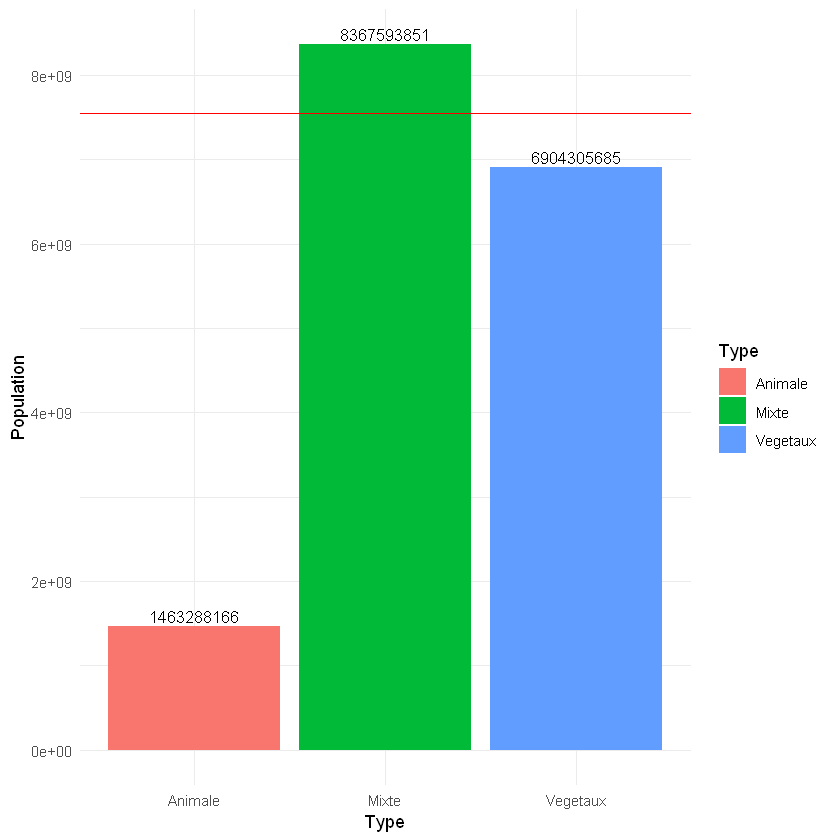

In [17]:
data_theo <- data.frame(Type=c("Mixte","Vegetaux","Animale") ,Population=c(Population_theorique,Total_nutrition_vegetaux,Total_nutrition_animal))
ggplot(data_theo, aes(x=Type, y=Population, fill=Type)) +
    geom_bar(stat="identity")+
    geom_text(aes(label=Population), vjust=-0.3, size=3.5)+
    theme_minimal()+
geom_hline(yintercept=sum(population_2017$poptotal*10^3),  color = "red")

## 3) Utilisation de la disponibilité intérieure <a name="disponibiliteinterieure"></a>

Equations de la disponibilite: Production
Avec les debuts des recherches de Julien, on a peut trouver une partie de l'utilisation de la disponibilite interieure centralier sur le commerce par la formule:
Importation - Exportations + Production + Variations des stocks

In [18]:
production_interieur = dispo_alimentaire[,c(1,10,11,12,15,18)]
production_interieur = aggregate(cbind(production_interieur$Importations...Quantité, production_interieur$Exportations...Quantité,production_interieur$Production,production_interieur$Variation.de.stock, production_interieur$Disponibilité.intérieure) , by=list(production_interieur$Zone), FUN=sum, na.rm=TRUE)
colnames(production_interieur)<-c("Zone","Importations","Exportations", "Production", "Variations", "Disponibilité.intérieure")
production_interieur["Total"] = production_interieur$Importations-production_interieur$Exportations+production_interieur$Production+production_interieur$Variations
head(production_interieur)

Zone,Importations,Exportations,Production,Variations,Disponibilité.intérieure,Total
Afghanistan,2988,278,11171,-368,13515,13513
Afrique du Sud,7517,11674,63263,2153,61256,61259
Albanie,933,94,3964,-45,4758,4758
Algérie,17403,655,26359,-479,42630,42628
Allemagne,65353,57431,154547,-192,162275,162277
Angola,4416,23,28857,-1228,32029,32022


Equations de la disponibilite: Alimentation:
Aliments pour animaux + Autres utilisations + Nourriture + Pertes + Semences + Traitement

In [19]:
production_alimentaire = dispo_alimentaire[,c(1,4,5, 10,13,14,16,17)]
production_alimentaire = aggregate.data.frame(cbind(production_alimentaire$Aliments.pour.animaux,production_alimentaire$Autres.Utilisations,production_alimentaire$Nourriture,production_alimentaire$Pertes,production_alimentaire$Semences,production_alimentaire$Traitement,production_alimentaire$Disponibilité.intérieure), by=list(production_alimentaire$Zone), FUN = sum, na.rm=TRUE)
colnames(production_alimentaire)<-c("Zone","Aliments pour animaux", "Autres utilisations","Nourriture", "Pertes", "Semences", "Traitement", "Disponibilité.intérieure")
production_alimentaire["Total"]= production_alimentaire$"Aliments pour animaux"+production_alimentaire$"Autres utilisations"+production_alimentaire$Nourriture+production_alimentaire$Pertes+production_alimentaire$Semences+production_alimentaire$Traitement
head(production_alimentaire)

Zone,Aliments pour animaux,Autres utilisations,Nourriture,Pertes,Semences,Traitement,Disponibilité.intérieure,Total
Afghanistan,768,415,10735,1135,395,63,13515,13511
Afrique du Sud,5309,876,29812,2193,253,22819,61256,61262
Albanie,660,174,3476,276,55,113,4758,4754
Algérie,4352,1707,31729,3753,449,637,42630,42627
Allemagne,30209,7711,79238,3781,1551,39842,162275,162332
Angola,9259,451,15059,4799,337,2121,32029,32026


#### Part attribuée à l’alimentation animale  <a name="Partalimentationanimale"></a>

In [20]:
utili_animale = round((sum(production_alimentaire$"Aliments pour animaux")/sum(production_alimentaire$Disponibilité.intérieure))*100, 2)
utili_animale

[1] 13.24

#### Part attribuée à l’alimentation humaine  <a name="Partalimentationhumaine"></a>

In [21]:
utili_humaine = round((sum(production_alimentaire$Nourriture)/sum(production_alimentaire$Disponibilité.intérieure))*100, 2)
utili_humaine

[1] 49.51

#### Part attribuée perdue  <a name="Partalimentationperdue"></a>

In [22]:
utili_perte = round((sum(production_alimentaire$Pertes)/sum(production_alimentaire$Disponibilité.intérieure))*100,2)
utili_perte

[1] 4.61

In [23]:
autres = 100-utili_perte-utili_humaine-utili_animale
autres

[1] 32.64

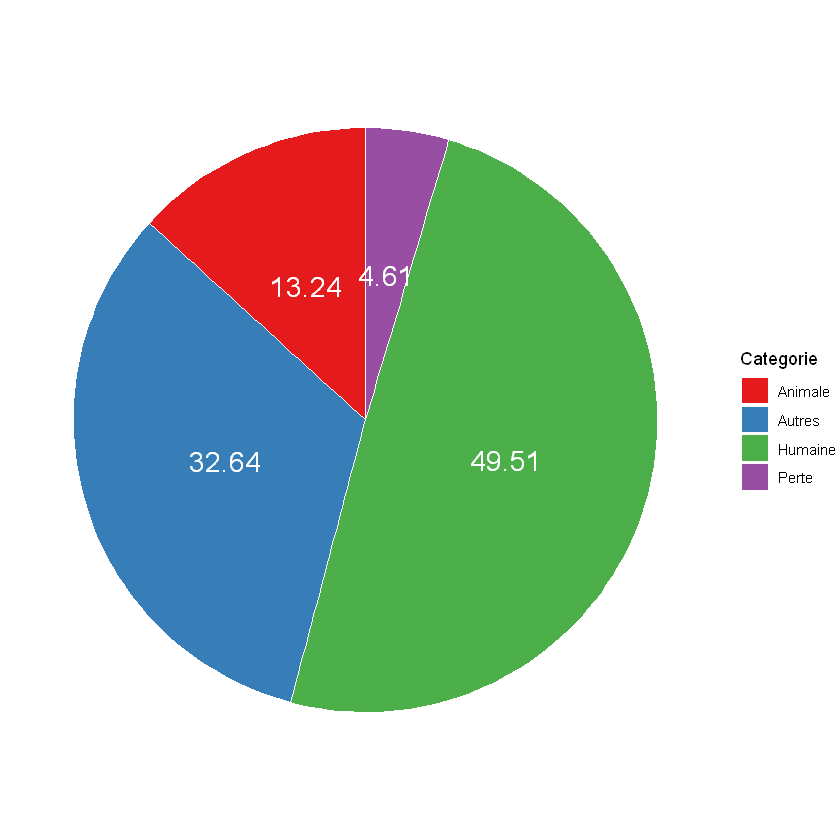

In [24]:
data <- data.frame(Categorie=c("Animale","Humaine","Perte","Autres") ,value=c(utili_animale,utili_humaine,utili_perte,autres))

data <- data %>% 
  arrange(desc(Categorie)) %>%
  mutate(prop = value / sum(data$value) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )

ggplot(data, aes(x="", y=prop, fill=Categorie)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  geom_text(aes(y = ypos, label = value), color = "white", size=6) +
  scale_fill_brewer(palette="Set1")

# Demandes de Mélanie <a name="DemandesMélanie"></a>

## Pays avec plus forts proportion sous alimentations en 2017 <a name="Paysfortsproportionsousalimentations2017"></a>

Pour ce calcul, on va omettre les pays pour lequels on a utiliser une valeur approximative de sous nutritition (<0.1) qui ne sont pas des figures officiellement recences et influe nos resultats.

In [25]:
prop_sous_nutrition_2017B =merge(sous_nutrition_2017, population_2017, by=c("Zone","Année"))
prop_sous_nutrition_2017B=prop_sous_nutrition_2017B[!(prop_sous_nutrition_2017B$val_sousnutri=="<0.1"),]
prop_sous_nutrition_2017B$val_sousnutri = as.numeric(as.character(prop_sous_nutrition_2017B$val_sousnutri))
prop_sous_nutrition_2017B =na.omit(prop_sous_nutrition_2017B)

In [26]:
prop_sous_nutrition_2017B['proportion']= prop_sous_nutrition_2017B$val_sousnutri/(prop_sous_nutrition_2017B$poptotal/1000)
toppays_sous_nutri = prop_sous_nutrition_2017B
toppays_sous_nutri = prop_sous_nutrition_2017B[order(-prop_sous_nutrition_2017B$proportion),]
head(toppays_sous_nutri, 15) 

,Zone,Année,val_sousnutri,poptotal,proportion
79,Haïti,2017,5.3,10982.366,0.4825918
159,République populaire démocratique de Corée,2017,12.0,25429.825,0.4718868
109,Madagascar,2017,10.5,25570.512,0.4106292
104,Libéria,2017,1.8,4702.226,0.3827974
101,Lesotho,2017,0.8,2091.534,0.3824944
184,Tchad,2017,5.7,15016.753,0.3795761
162,Rwanda,2017,4.2,11980.961,0.3505562
122,Mozambique,2017,9.4,28649.018,0.3281090
187,Timor-Leste,2017,0.4,1243.258,0.3217353
1,Afghanistan,2017,10.5,36296.113,0.2892872


## Pays qui ont le plus bénéficié d’aide depuis 2013 <a name="Paysfortaide2013"></a>

Une partie des questions melanie sont sur l'annee 2013 donc je vaiis de nouveaux calculer la population:

In [27]:
population_2013 = dplyr::filter(population, Année == 2013)
colnames(population_2013)[3]<-'poptotal'

In [28]:
Aides_2013= aggregate(aide_alimentaire$Valeur, by=list(aide_alimentaire$Pays.bénéficiaire), FUN=sum)
colnames(Aides_2013)[1]<-"Zone"
colnames(Aides_2013)[2]<-"Aides"
Aides_2013=Aides_2013[order(-Aides_2013$Aides),]
head(Aides_2013, 20)

,Zone,Aides
54,République arabe syrienne,1858943
22,Éthiopie,1381294
74,Yémen,1206484
66,Soudan du Sud,695248
65,Soudan,669784
34,Kenya,552836
4,Bangladesh,348188
64,Somalie,292678
56,République démocratique du Congo,288502
48,Niger,276344


## Pays ayant le plus de disponibilite/habitant <a name="Paysfortdisponibilite/habitant"></a>

In [29]:
Dispo_Int = dispo_alimentaire[, c("Zone", "Disponibilité.alimentaire..Kcal.personne.jour.")]
Dispo_Int = aggregate(Dispo_Int$Disponibilité.alimentaire..Kcal.personne.jour., by=list(Dispo_Int$Zone), FUN=sum, na.rm=TRUE)
colnames(Dispo_Int)[1]="Zone"
colnames(Dispo_Int)[2]="Disponibilite"

#Enfin pour les ordonner:

In [30]:
head(Dispo_Int[order(-Dispo_Int$Disponibilite),],10)

,Zone,Disponibilite
12,Autriche,3770
18,Belgique,3737
166,Turquie,3708
55,États-Unis d'Amérique,3682
81,Israël,3610
79,Irlande,3602
82,Italie,3578
96,Luxembourg,3540
48,Égypte,3518
5,Allemagne,3503


## Pays ayant le moins de disponibilite/habitant <a name="Paysfaiblesdisponibilite/habitant"></a>

In [31]:
head(Dispo_Int[order(Dispo_Int$Disponibilite),],10)

,Zone,Disponibilite
133,République centrafricaine,1879
173,Zambie,1924
98,Madagascar,2056
1,Afghanistan,2087
71,Haïti,2089
138,République populaire démocratique de Corée,2093
158,Tchad,2109
174,Zimbabwe,2113
121,Ouganda,2126
56,Éthiopie,2129


# Observations de Julien <a name="ObservationsJulien"></a>

## Utilisations du Cereal <a name="UtilisationsCereal"></a>

In [32]:
util_cereal = dispo_alimentaire[,c(1,2,4,10, 13)]
util_cereal <- filter(util_cereal,Produit %in% cereal$Produit)
head(util_cereal)

Zone,Produit,Aliments.pour.animaux,Disponibilité.intérieure,Nourriture
Afghanistan,Blé,NA,5992,4895
Afghanistan,"Céréales, Autres",NA,0,0
Afghanistan,Maïs,200,313,76
Afghanistan,Millet,NA,13,12
Afghanistan,Orge,360,524,89
Afghanistan,Riz (Eq Blanchi),NA,461,422


In [33]:
util_cereal = aggregate.data.frame(cbind(util_cereal$Aliments.pour.animaux,util_cereal$Nourriture,util_cereal$Disponibilité.intérieure), by=list(util_cereal$Zone), FUN = sum, na.rm=TRUE)
colnames(util_cereal)<-c("Zone","Aliments pour animaux","Nourriture","Disponibilité.intérieure")
util_cereal["Total"]= util_cereal$"Aliments pour animaux"+util_cereal$Nourriture
head(util_cereal, 10)

Zone,Aliments pour animaux,Nourriture,Disponibilité.intérieure,Total
Afghanistan,560,5494,7303,6054
Afrique du Sud,4824,9503,15493,14327
Albanie,411,474,1145,885
Algérie,4337,8535,15013,12872
Allemagne,26615,9191,42158,35806
Angola,316,1911,2950,2227
Antigua-et-Barbuda,0,7,8,7
Arabie saoudite,11680,4439,16595,16119
Argentine,6533,5116,16176,11649
Arménie,332,405,892,737


In [34]:
head(util_cereal, 10)

Zone,Aliments pour animaux,Nourriture,Disponibilité.intérieure,Total
Afghanistan,560,5494,7303,6054
Afrique du Sud,4824,9503,15493,14327
Albanie,411,474,1145,885
Algérie,4337,8535,15013,12872
Allemagne,26615,9191,42158,35806
Angola,316,1911,2950,2227
Antigua-et-Barbuda,0,7,8,7
Arabie saoudite,11680,4439,16595,16119
Argentine,6533,5116,16176,11649
Arménie,332,405,892,737


In [35]:
head(util_cereal[order(-util_cereal$Nourriture),],10)

,Zone,Aliments pour animaux,Nourriture,Disponibilité.intérieure,Total
36,"Chine, continentale",193042,209038,483482,402080
75,Inde,11419,185886,216517,197305
76,Indonésie,8045,48845,74532,56890
55,États-Unis d'Amérique,140096,33810,343006,173906
15,Bangladesh,2731,29765,35890,32496
123,Pakistan,1587,25838,32187,27425
116,Nigéria,4064,23843,31533,27907
25,Brésil,43264,23290,79455,66554
57,Fédération de Russie,30806,21141,68227,51947
48,Égypte,12585,20687,37968,33272


In [36]:
head(util_cereal[order(-util_cereal$"Aliments pour animaux"),],10)

,Zone,Aliments pour animaux,Nourriture,Disponibilité.intérieure,Total
36,"Chine, continentale",193042,209038,483482,402080
55,États-Unis d'Amérique,140096,33810,343006,173906
25,Brésil,43264,23290,79455,66554
57,Fédération de Russie,30806,21141,68227,51947
5,Allemagne,26615,9191,42158,35806
52,Espagne,24926,4971,33495,29897
32,Canada,23905,4200,32769,28105
107,Mexique,20516,19506,47838,40022
167,Ukraine,19890,6261,32235,26151
60,France,19103,8181,35536,27284


In [37]:
util_cereal_animaux = (sum(util_cereal$Aliments.pour.animaux,na.rm=TRUE)/sum(util_cereal$Disponibilité.intérieure,na.rm=TRUE))*100
util_cereal_animaux

[1] 0

In [38]:
util_cereal_humain = (sum(util_cereal$Nourriture,na.rm=TRUE)/sum(util_cereal$Disponibilité.intérieure,na.rm=TRUE))*100
util_cereal_humain

[1] 42.75074

En calculant la proportion d'utilisations du cereal pour les etres humains et les animaux en fonction de la distribution interieure, ont retrouve une valeur de 42,7% pour la part humaine et 36,29% pour les animaux. Le reste des pourcentages correspond aux autres valeurs (traitement, pertes, autres utilisations...etc).

## Utilisations du Manioc en Thailand: <a name="UtilisationsManioc"></a>

In [39]:
Thailande = dplyr::filter(dispo_alimentaire, Zone=="Thaïlande" & Produit=="Manioc" )
Thai = dplyr::filter(production_alimentaire, Zone=="Thaïlande")
Thailande_nutri = dplyr::filter(prop_sous_nutrition_2017B, Zone=="Thaïlande")
Thailande

Zone,Produit,Origine,Aliments.pour.animaux,Autres.Utilisations,Disponibilité.alimentaire..Kcal.personne.jour.,Disponibilité.alimentaire.en.quantité..kg.personne.an.,Disponibilité.de.matière.grasse.en.quantité..g.personne.jour.,Disponibilité.de.protéines.en.quantité..g.personne.jour.,Disponibilité.intérieure,Exportations...Quantité,Importations...Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation.de.stock
Thaïlande,Manioc,vegetale,1800,2081,40,13,0.05,0.14,6264,25214,1250,871,1511,30228,NA,0,0


En analysant l'utilisation de la distribution du manioc en Thailande, on peut constater le fort taux d'exportations de 25214 tonnes pour une productions de 30228 tonnes

In [40]:
Thailande_manioc = Thailande[, c(11, 15)]
Thailande_manioc

Exportations...Quantité,Production
25214,30228


In [41]:
Thailande_nutri

Zone,Année,val_sousnutri,poptotal,proportion
Thaïlande,2017,6.2,69209.81,0.08958268


In [42]:
Thai

Zone,Aliments pour animaux,Autres utilisations,Nourriture,Pertes,Semences,Traitement,Disponibilité.intérieure,Total
Thaïlande,9561,4210,39283,5749,823,99170,158130,158796


In [56]:
ThailandeB = dplyr::filter(dispo_alimentaire, Zone=="Thaïlande")
ThailandeC = ThailandeB[, c(2, 6, 11, 15)]
ThailandeC

Produit,Disponibilité.alimentaire..Kcal.personne.jour.,Exportations...Quantité,Production
Abats Comestible,3,5,45
"Agrumes, Autres",0,6,12
"Alcool, non Comestible",NA,110,447
Aliments pour enfants,2,7,NA
Ananas,10,1449,2209
Animaux Aquatiques Autre,1,25,110
Arachides Decortiquees,9,5,33
Avoine,0,0,NA
Bananes,26,446,1600
"Beurre, Ghee",4,1,NA


,Produit,Disponibilité.alimentaire..Kcal.personne.jour.,Exportations...Quantité,Production
51,Manioc,40,25214,30228
79,Riz (Eq Blanchi),1139,6860,24054
83,Sucre Eq Brut,368,6462,10024
25,"Fruits, Autres",63,2671,6141
5,Ananas,10,1449,2209
73,Poissons Pelagiques,30,1390,595


In [ ]:
head(ThailandeC[order(-ThailandeC$Exportations...Quantité),])